<a href="https://colab.research.google.com/github/dhrg/neuralnets/blob/master/iris/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A neural net with Keras/scikit-learn for multi-class classification on toy dataset


In [0]:
#import theano
#print theano.config.device
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import model_from_json

import numpy as np
import itertools
import matplotlib.pyplot as plt
#import cv2
#import os
%matplotlib inline


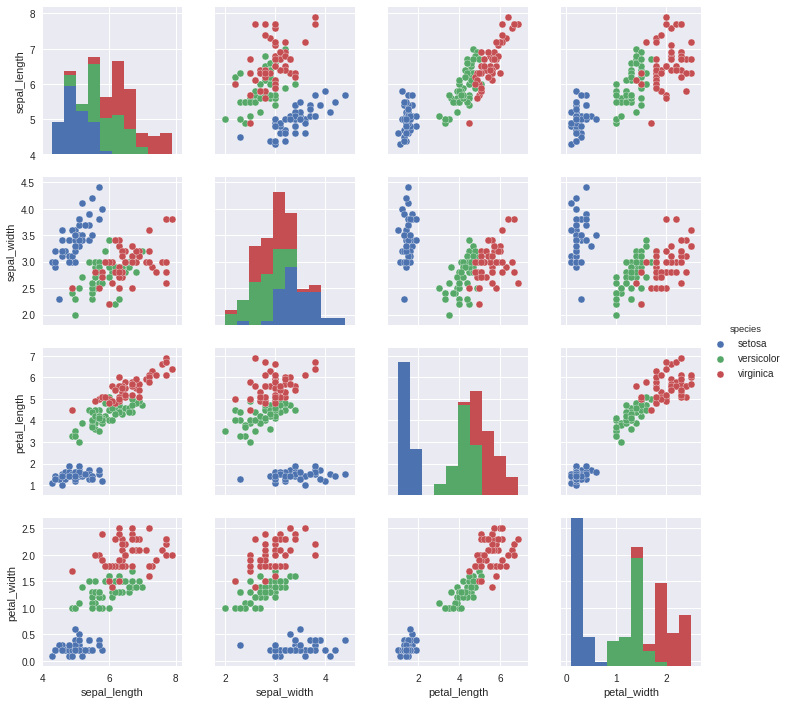

In [63]:
# random seed, reproducibility, and getting the data 
seed = 1
np.random.seed(seed)

# generate dummy radom training data or get dataset. we will get iris dataset
'''
data_dim = 3
data_size = 1000
nb_classes = 2

X = np.random.random((data_size, data_dim))
Yr = np.random.randint(nb_classes, size=(data_size, ))
# purpeosuly converting to strings as usually labels of data are strings and 
# classes should be in integers, or if they are strings they should be first converted to integers
Ys = np.char.mod('%d', Yr)  #making our integer classes synthetically strings
'''

sn.set()
iris = sn.load_dataset("iris")
sn.pairplot(iris, hue='species')

X = iris.values[:,0:4]
Y = iris.values[:,4]

# train test split
X_train, X_test, Ys_train, Ys_test = train_test_split(X, Y, stratify=Y, test_size=0.33, random_state=seed)

In [0]:
# pre-processing the data, converting string labels to integers
encoder = LabelEncoder()
encoder.fit(Y)
list(encoder.classes_)

Yi_train = encoder.transform(Ys_train)
Yi_test = encoder.transform(Ys_test)

#np.array(np.unique(Yi_test, return_counts=True))
# convert integers now to dummy variables (i.e. one-hot encoded)
Y_train = np_utils.to_categorical(Yi_train)
Y_test = np_utils.to_categorical(Yi_test)

In [136]:
# neural net architecture building
model = Sequential()

# create network architecture with regularization
model.add(Dense(80, input_shape=(4,), init='uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(40, init='uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(3, init='uniform'))
model.add(Activation('sigmoid'))

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,  
              metrics=["accuracy"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(80, input_shape=(4,), kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(40, kernel_initializer="uniform")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


In [0]:
# training data
# check also http://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/ for using train_test_split and
# validationa_data within model.fit

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=300, batch_size=10, verbose=0)

In [138]:
# lets check accuracy on test data
score = model.evaluate(X_test, Y_test, verbose=0)
print("test %s: %.2f%%" % (model.metrics_names[1], score[1]*100))

test acc: 96.00%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


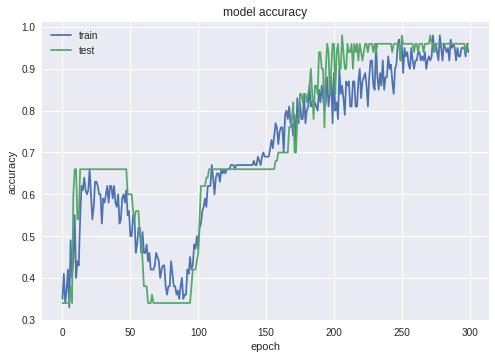

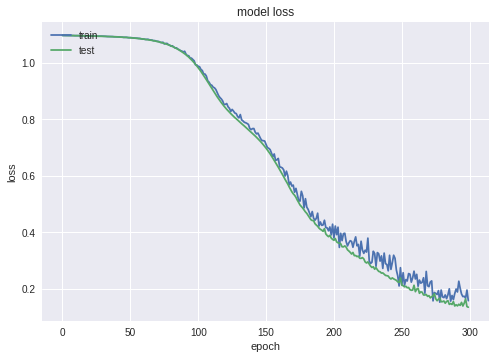

In [139]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [150]:
#lets save our model and weights, for someone to use
#serialize model and weights 
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")
 
#some time later in the future by someone or yourself...
 
#load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

#load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
#needs to be compiled again to be used
loaded_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

Saved model to disk
Loaded model from disk


In [149]:
# lets evaluate our loaded model, also do some confusion matrix and classification report
predictions = loaded_model.predict_classes(X_test, verbose=0)
print(predictions)
pred = encoder.inverse_transform(predictions)
print(pred)

target_names = list(encoder.classes_)
print(classification_report(Yi_test, predictions, target_names=target_names))

[2 2 1 2 0 2 2 2 1 1 0 0 0 0 2 0 2 0 1 1 1 2 2 2 2 0 0 1 1 2 1 1 0 0 2 1 1
 2 2 2 2 0 0 0 1 1 2 1 0 0]
['virginica' 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'setosa' 'setosa'
 'setosa' 'setosa' 'virginica' 'setosa' 'virginica' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'virginica' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'setosa' 'versicolor' 'versicolor' 'virginica' 'versicolor' 'setosa'
 'setosa']
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.88      0.94        17
   virginica       0.89      1.00      0.94        17

   micro avg       0.96      0.96      0.96        50
   macro avg       0.96      0.96      0.96     

In [147]:
# lets apply custom prediction on your flower
prediction = loaded_model.predict_classes(np.array([[4, 3, 1, 0.1]]), verbose=0)
yourflower = encoder.inverse_transform(prediction)
print("Your flower is %s." % yourflower[0])

Your flower is setosa.


In [0]:
# EOF (End Of File)